In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Drop Constant Features

* constant features does not contain any predictive power so we should not use those for training.
* These features if numeric can be dropped using VarianceThreshold in sklearn
* Here the idea is to drop all the numerical features where the threshold if the feature is 0. (All the values are same).
* This can be extended to a Quasi Constant features where values are almost same (varience ~ 0) by giving very low threshold. i.e. 0.0001

Data Source

https://www.kaggle.com/competitions/santander-customer-satisfaction/data?select=train.csv

In [2]:
# !kaggle competitions download -c santander-customer-satisfaction

data_path = '../../data/santander-customer-satisfaction-train.csv'
train_df = pd.read_csv(data_path)
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train_df.shape

(76020, 371)

In [4]:
train_df = pd.read_csv(data_path, nrows=5000)
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
train_df.shape

(5000, 371)

In [7]:
train_df.describe(include="all")

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000
mean,5002.772600,-797.14360,33.301400,67.585866,73.909104,128.447832,7.621404,15.057756,0.270000,0.504000,...,6.754380,2.540832,7.034394,5.443206,21.349686,3.959034,32.519076,24.706278,1.180885e+05,0.04240
std,2898.477702,28275.83749,12.911417,826.270264,343.516202,615.190506,168.445712,300.254202,13.581752,20.987474,...,298.348854,113.669652,312.112298,236.255007,793.373615,267.968624,1073.456219,822.682157,1.651772e+05,0.20152
min,1.000000,-999999.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.00000
25%,2471.750000,2.00000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.779807e+04,0.00000
50%,5011.000000,2.00000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.076674e+05,0.00000
75%,7533.250000,2.00000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.210269e+05,0.00000
max,9986.000000,229.00000,102.000000,39000.000000,7904.220000,11073.570000,7904.220000,11073.570000,750.000000,960.000000,...,15265.950000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,8.554229e+06,1.00000


In [16]:
from sklearn.feature_selection import VarianceThreshold


X_train = train_df.drop('TARGET',axis=1)

var_threshold = VarianceThreshold(threshold=0)

var_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [17]:
total_features = len(var_threshold.get_support())
features_with_non_0_variance = sum(var_threshold.get_support())

features_with_0_variance = total_features - features_with_non_0_variance
print(total_features, features_with_non_0_variance, features_with_0_variance)

370 279 91


In [19]:
# Now lets see the feature names with 0 variance


zero_var_cols = [col_name for col_name in X_train.columns if col_name not in X_train.columns[var_threshold.get_support()]]
print(zero_var_cols)

['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var

In [20]:
# Remove 0 var columns

X_train = X_train.drop(zero_var_cols, axis=1)

In [21]:
X_train.shape

(5000, 279)

# Drop Features Using Pearson Correlation

* This is to remove multicollinearity. 

In [23]:
boston_housing_data = pd.read_csv('../../data/BostonHousing.csv')
boston_housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
X_train = boston_housing_data.drop('medv',axis=1)
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:
corr_matrix = X_train.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


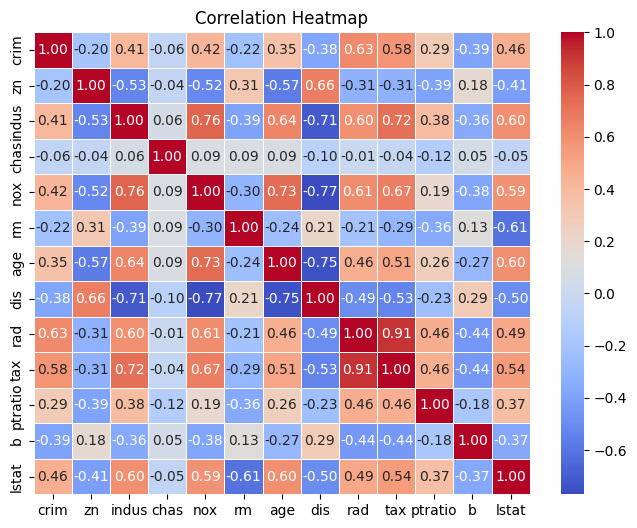

In [27]:
# Lets plot this in heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
def high_correlation_features(df, threshold=0.9):
    """
    Get a list of tuples of highly correlated features.

    Parameters:
    - df: pandas DataFrame
        The input DataFrame containing the features.
    - threshold: float, optional (default=0.9)
        The correlation threshold above which features are considered highly correlated.

    Returns:
    - correlated_features: list
        A list of tuples where each tuple contains a pair of highly correlated features.
    """
    # Calculate correlation matrix
    corr_matrix = df.corr().abs()

    # Find features with correlation greater than threshold
    high_corr_matrix = (corr_matrix > threshold)

    # Extract correlated feature pairs
    correlated_features = []
    for col in high_corr_matrix.columns:
        correlated_cols = high_corr_matrix.index[high_corr_matrix[col]].tolist()
        for correlated_col in correlated_cols:
            if col != correlated_col:  # Exclude self-correlation
                correlated_features.append((col, correlated_col))

    # Remove duplicates (considering both (A, B) and (B, A) as the same pair)
    correlated_features = list(set([tuple(sorted(pair)) for pair in correlated_features]))

    return correlated_features

In [36]:
high_correlation_features(X_train, threshold = 0.9)

[('rad', 'tax')]

From here I need to remove either rad or tax.

# Information Gain in classification

In [4]:
wine_df = pd.read_csv('../../data/wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine_df.shape

(178, 14)

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Lets split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('Wine',axis=1),wine_df['Wine'],random_state=2024, test_size=0.3)

In [8]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.45108949, 0.22837494, 0.09353919, 0.3709004 , 0.16438294,
       0.41523979, 0.60388711, 0.09806044, 0.1906021 , 0.56848   ,
       0.51941136, 0.49679338, 0.54296022])

In [9]:
mutual_info_ser = pd.Series(mutual_info)
mutual_info_ser.index = X_train.columns
mutual_info_ser.sort_values(ascending=True)

Ash                     0.093539
Nonflavanoid.phenols    0.098060
Mg                      0.164383
Proanth                 0.190602
Malic.acid              0.228375
Acl                     0.370900
Phenols                 0.415240
Alcohol                 0.451089
OD                      0.496793
Hue                     0.519411
Proline                 0.542960
Color.int               0.568480
Flavanoids              0.603887
dtype: float64

<Axes: >

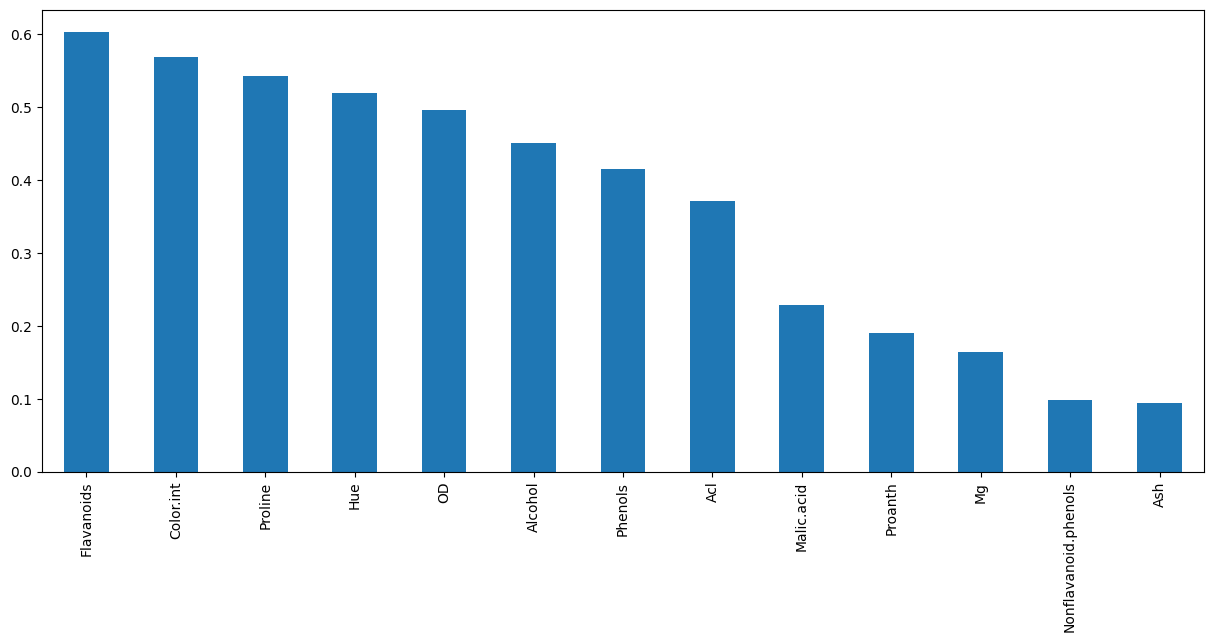

In [12]:
# Lets plot this

mutual_info_ser.sort_values(ascending=False).plot.bar(figsize=(15,6))

In [16]:
# select best n features

from sklearn.feature_selection import SelectKBest

select_five_cols = SelectKBest(mutual_info_classif, k=5)
select_five_cols.fit(X_train, y_train)

X_train.columns[select_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## Train Full model and check accuracy

In [35]:
X_train.shape

(124, 13)

In [23]:
# Scale features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

lr_all_cols = LogisticRegression(max_iter=50)
lr_all_cols.fit(X_train_scaled,y_train)

print(lr_all_cols.score(X_test_scaled,y_test))

0.9629629629629629


## Train model on top 5 columns only

In [30]:
X_train_top_5 = X_train[X_train.columns[select_five_cols.get_support()]]
X_test_top_5 = X_test[X_train.columns[select_five_cols.get_support()]]
X_train_top_5

,Flavanoids,Color.int,Hue,OD,Proline
52,3.74,7.05,1.01,3.26,1190
35,2.98,5.10,1.04,3.47,920
37,2.43,4.25,1.12,2.51,1105
79,2.55,2.57,1.19,3.13,463
75,1.57,3.80,1.23,2.14,428
...,...,...,...,...,...
36,2.68,4.60,1.09,2.78,880
27,2.19,3.95,1.02,2.77,1285
128,2.45,2.12,0.89,2.78,342
96,0.99,2.50,0.95,2.26,625


In [32]:
X_train_top_5.shape , X_test_top_5.shape

((124, 5), (54, 5))

In [33]:
top_5_scaler = MinMaxScaler() 
X_train_top_5_scaled = top_5_scaler.fit_transform(X_train_top_5)
X_test_top_5_scaled = top_5_scaler.transform(X_test_top_5)

In [34]:
from sklearn.linear_model import LogisticRegression

lr_top5_cols = LogisticRegression(max_iter=50)
lr_top5_cols.fit(X_train_top_5_scaled,y_train)

print(lr_top5_cols.score(X_test_top_5_scaled,y_test))

0.9074074074074074


So by adding all extra columns, I am just getting 6% extra accuracy

# Information gain in Regression

In [2]:
house_pricing_df = pd.read_csv('../../data/house-prices-advanced-regression-techniques-train.csv')
house_pricing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# select only numeric columns

num_dtypes = ["int16",'int32','int64','float16','float32','float64']
num_columns = list(house_pricing_df.select_dtypes(include=num_dtypes).columns)
num_columns[0:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [5]:
len(num_columns)

38

In [11]:
house_pricing_df_num = house_pricing_df[num_columns].drop('Id',axis=1) # remove id as thats not required
house_pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
nan_counts = house_pricing_df_num.isna().sum()
nan_counts[nan_counts > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
house_pricing_df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
from sklearn.model_selection import train_test_split

X = house_pricing_df_num.drop('SalePrice',axis=1)
y = house_pricing_df_num['SalePrice']
X_train, X_test,y_train, y_test = train_test_split(
    X,y,random_state=2024,test_size=0.3
)

In [15]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
302,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006
26,20,60.0,7200,5,7,1951,2000,0.0,234,486,...,576,222,32,0,0,0,0,0,5,2010
680,120,50.0,8012,6,5,1980,1980,0.0,543,119,...,264,80,0,0,0,0,0,0,5,2010
478,20,79.0,10637,8,5,2007,2008,336.0,1288,0,...,826,208,44,0,0,0,0,0,9,2009
793,20,76.0,9158,8,5,2007,2007,140.0,0,0,...,474,168,130,0,0,0,0,0,6,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,50,63.0,11426,7,5,2003,2003,0.0,0,0,...,484,280,238,0,0,0,0,0,6,2008
446,20,137.0,16492,6,6,1966,2002,0.0,247,713,...,578,0,0,0,0,0,0,0,6,2010
539,20,NaN,11423,8,5,2001,2002,479.0,1358,0,...,670,180,0,0,0,0,0,2000,5,2010
640,120,62.0,12677,8,5,2003,2004,472.0,1218,0,...,588,185,140,0,0,0,0,0,4,2008


In [16]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.28816349, 0.19276775, 0.16809094, 0.58050408, 0.09596885,
       0.33763988, 0.24913714, 0.1001944 , 0.16619247, 0.00882827,
       0.11973942, 0.35054411, 0.32548213, 0.20739684, 0.        ,
       0.50984612, 0.00449139, 0.01622709, 0.26507841, 0.08483967,
       0.03721713, 0.03309406, 0.22766467, 0.18690777, 0.25450801,
       0.35767174, 0.36457906, 0.11187465, 0.14214884, 0.04421436,
       0.        , 0.01372482, 0.        , 0.        , 0.01821531,
       0.00310901])

In [17]:
mutual_info_ser = pd.Series(mutual_info)
mutual_info_ser.index = X_train.columns
mutual_info_ser.sort_values(ascending=False)

OverallQual      0.580504
GrLivArea        0.509846
GarageArea       0.364579
GarageCars       0.357672
TotalBsmtSF      0.350544
YearBuilt        0.337640
1stFlrSF         0.325482
MSSubClass       0.288163
FullBath         0.265078
GarageYrBlt      0.254508
YearRemodAdd     0.249137
TotRmsAbvGrd     0.227665
2ndFlrSF         0.207397
LotFrontage      0.192768
Fireplaces       0.186908
LotArea          0.168091
BsmtFinSF1       0.166192
OpenPorchSF      0.142149
BsmtUnfSF        0.119739
WoodDeckSF       0.111875
MasVnrArea       0.100194
OverallCond      0.095969
HalfBath         0.084840
EnclosedPorch    0.044214
BedroomAbvGr     0.037217
KitchenAbvGr     0.033094
MoSold           0.018215
BsmtHalfBath     0.016227
ScreenPorch      0.013725
BsmtFinSF2       0.008828
BsmtFullBath     0.004491
YrSold           0.003109
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
LowQualFinSF     0.000000
dtype: float64

<Axes: >

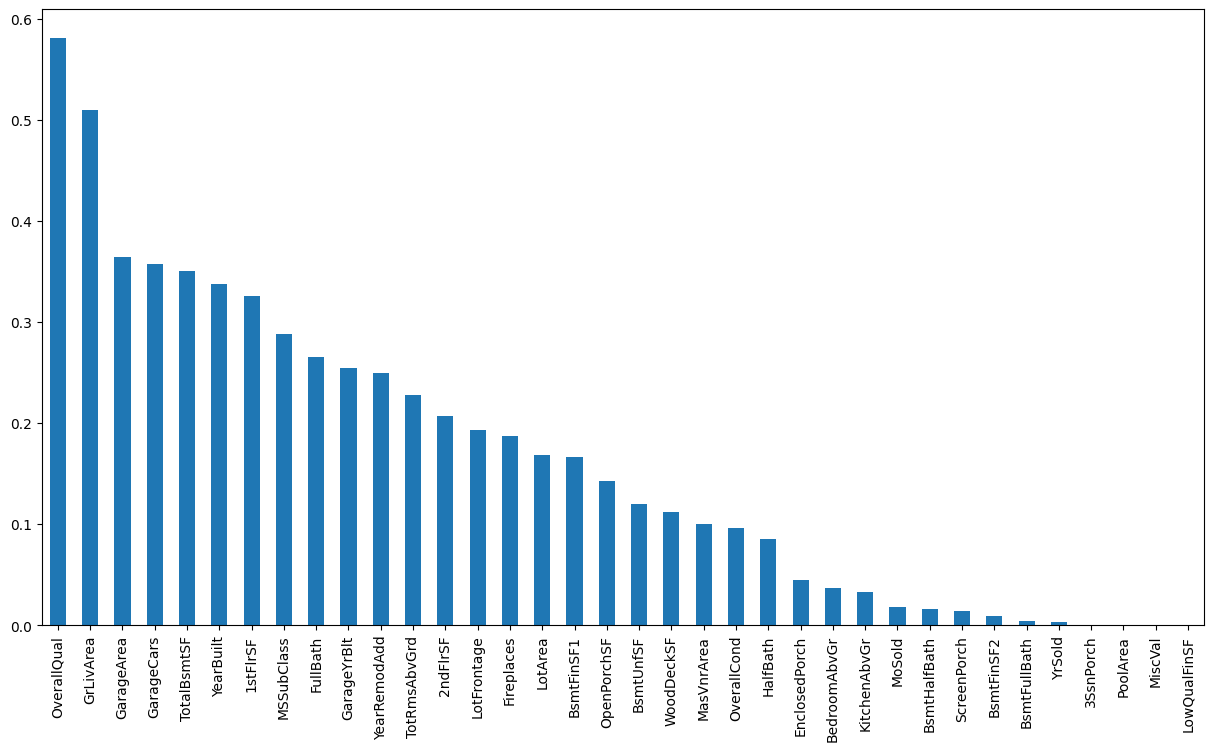

In [19]:
# Lets plot a bar chart

mutual_info_ser.sort_values(ascending=False).plot.bar(figsize=(15,8))

In [20]:
# select top n percentile features

from sklearn.feature_selection import SelectPercentile

select_top_cols = SelectPercentile(mutual_info_regression, percentile=20)
select_top_cols.fit(X_train.fillna(0),y_train)
select_top_cols

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000022BAA982C20>)

In [21]:
X_train.columns[select_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Cross Tab analysis for CAT vs CAT

If we want to see the relation between two categorical variables, CROSS TAB is a great technique

In [22]:
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math']
}

df = pd.DataFrame(data)
df.head()

,Student_ID,Gender,Subject
0,1,M,Math
1,2,F,Science
2,3,M,Math
3,4,F,Science
4,5,M,Math


Here we have two CAT features Gender and Subject and we want to see if there is any relation between these two so same can be done using cross tab

In [25]:
pd.crosstab(df.Gender,df.Subject)

Subject,Math,Science
Gender,,
F,0,2
M,3,0


Here we see that we have a clear relation because all males are in Maths and females are in Science.

In [27]:
# Now we generate the dataset randomly and will see that there is no relation

# Generating random data
np.random.seed(0)
data = {
    'Gender': np.random.choice(['M', 'F'], size=100),
    'Subject': np.random.choice(['Math', 'Science'], size=100)
}

df = pd.DataFrame(data)

# Crosstabulation
cross_tab = pd.crosstab(df['Gender'], df['Subject'])
cross_tab

Subject,Math,Science
Gender,,
F,31,25
M,24,20
